In [15]:
%load_ext autoreload
%autoreload 2
import impact as cimp
import bound_prot_dam as bpd
import exposures as ex
import alt_pay_opt as apo
import set_nominal as snom
import haz_int_grd as hig
import exposures_alt as aexp

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def sng_cty_bond(country, prot_share, grid_specs, low_to_prot=None, to_prot_share=None, incl_plots=False):    
    #load tc_tracks, create hazard class and calculate exposure
    exp, applicable_basin, grid_gdf, admin_gdf, storm_basin_sub, tc_storms = aexp.init_TC_exp(country=country, grid_specs=grid_specs, load_fls=True, plot_exp=incl_plots, plot_centrs=incl_plots, plt_grd=True)
    imp, imp_per_event, imp_admin_evt = cimp.init_imp(exp, tc_storms, admin_gdf, plot_frequ=incl_plots) 
    if low_to_prot is not None: 
            imp_per_event_flt, imp_admin_evt_flt, imp_lower_rp = bpd.init_imp_flt(imp_per_event, imp_admin_evt, lower_rp=low_to_prot)
    else:
        imp_per_event_flt, imp_admin_evt_flt, imp_lower_rp = bpd.init_imp_flt(imp_per_event, imp_admin_evt, prot_share=to_prot_share, exposure=exp)
    int_grid = hig.init_haz_int(grid_gdf, admin_gdf, tc_storms=tc_storms, stat='mean')
    nominal = snom.init_nominal(impact=imp, exposure=exp, prot_share=prot_share, print_nom=False)
    result, optimized_1, optimized_2 = apo.init_alt_optimization(int_grid, nominal, damages_grid=imp_admin_evt_flt, damages_evt=imp_per_event_flt, print_params=incl_plots)
    pay_dam_df = apo.alt_pay_vs_damage(imp_per_event_flt, optimized_1, optimized_2, int_grid, nominal, imp_admin_evt)
    print(np.sum(pay_dam_df['damage']) - np.sum(pay_dam_df['pay']))
    return np.sum(pay_dam_df['damage']) - np.sum(pay_dam_df['pay']), len(optimized_1), exp

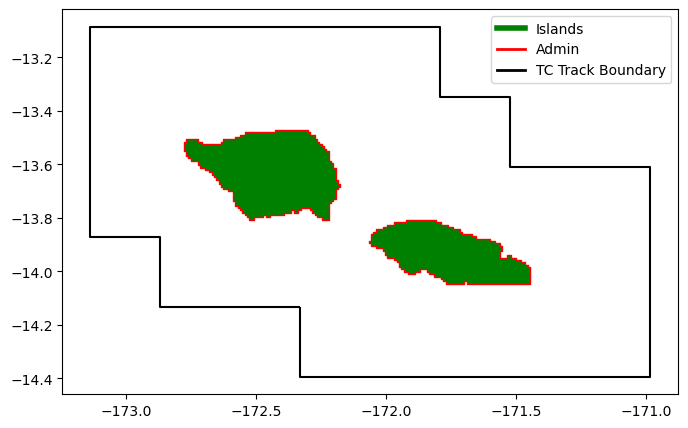

Number of tracks in SP basin: 1767
13662884439.76918


In [45]:
#choose country
country = 882

#define maximum and minimum share to cover
prot_share = 0.25
to_prot_share = 0.065

target_sharpe = 0.5
rf_rate = 0.00

grid_specs = {
    0: [1,1], 
    1: [1,1] 
}

br, y, exp = sng_cty_bond(country, prot_share, grid_specs, to_prot_share=to_prot_share, incl_plots=False)


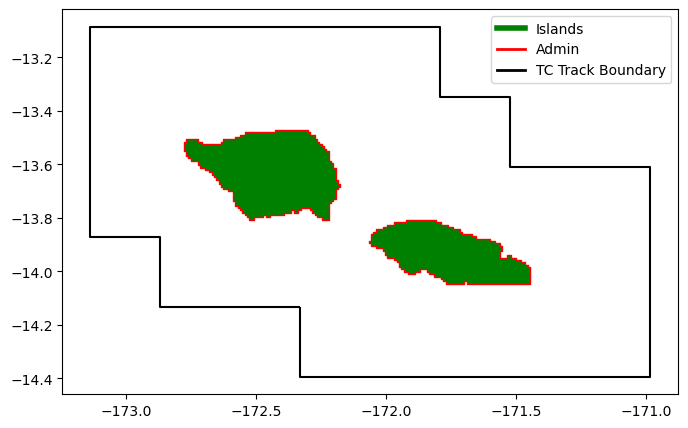

Number of tracks in SP basin: 1767
13662884439.76918


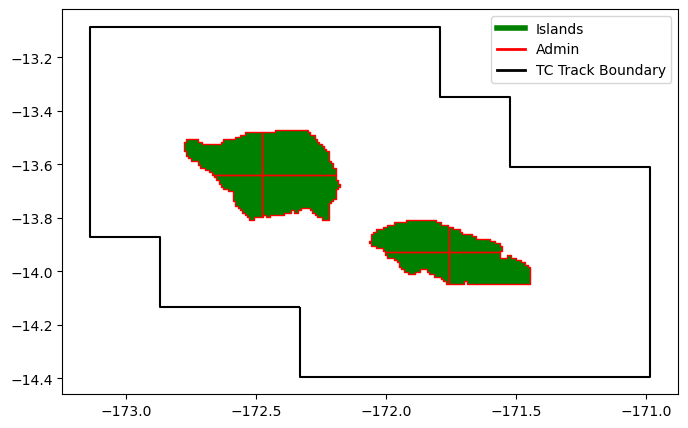

Number of tracks in SP basin: 1767
13826852667.640205


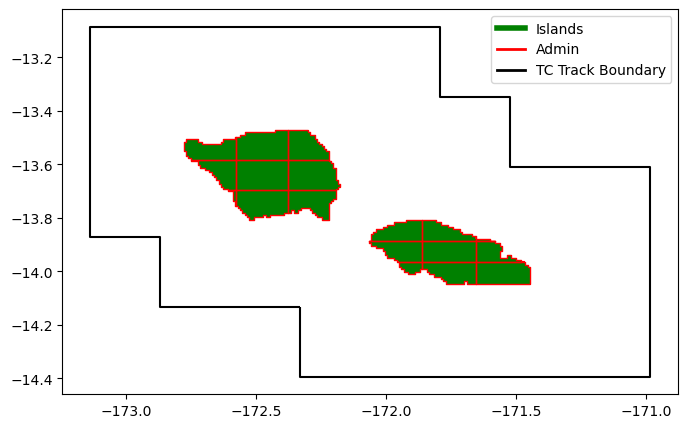

Number of tracks in SP basin: 1767
14044927926.762817


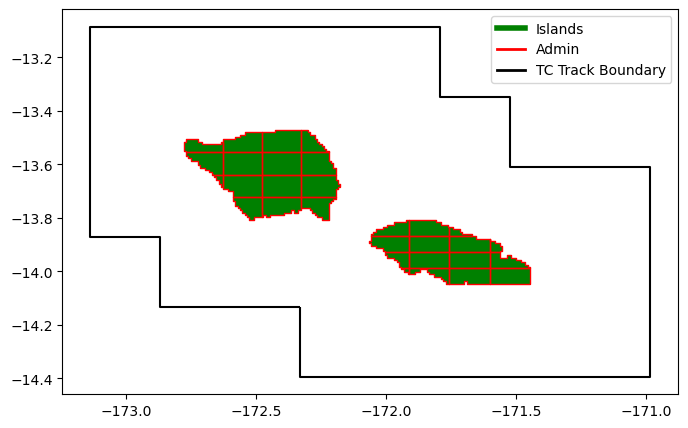

Number of tracks in SP basin: 1767
13952023375.7575


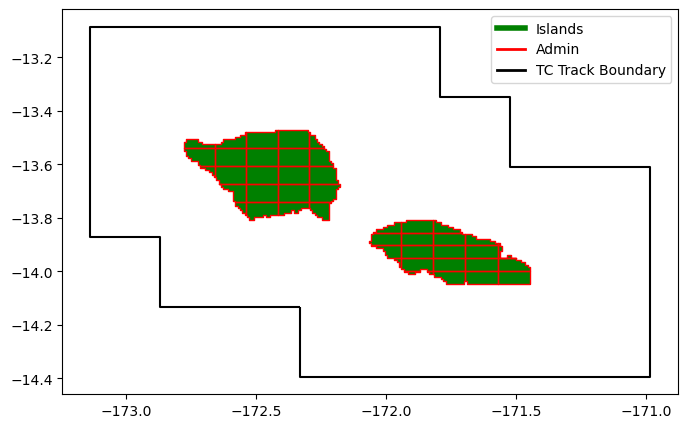

Number of tracks in SP basin: 1767
13990869866.679367


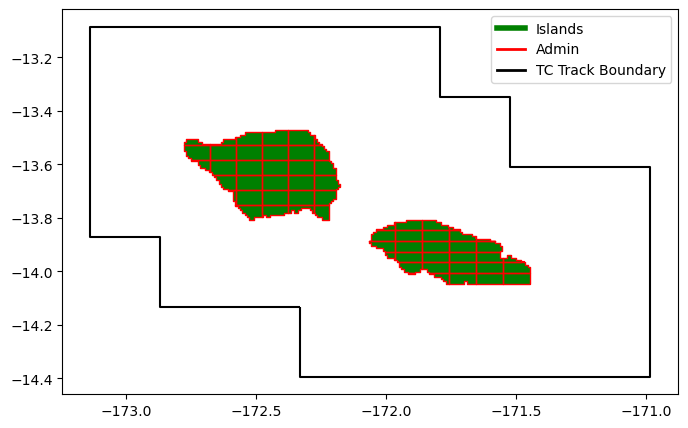

Number of tracks in SP basin: 1767
14055532159.067764


In [50]:
br_lst = []
y_lst = []

for i in range(6):
    grid_specs = {
        0: [1+i,1+i], 
        1: [1+i,1+i] 
    }
    br, y, exp = sng_cty_bond(country, prot_share, grid_specs, to_prot_share=to_prot_share, incl_plots=False)
    br_lst.append(br)
    y_lst.append(y)

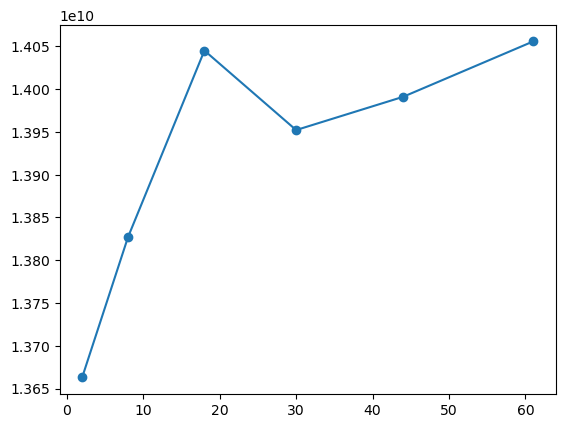

In [51]:
plt.plot(y_lst, br_lst, marker='o')

In [52]:
np.min(br_lst) / np.max(br_lst) * 100

97.2064542640225